In [125]:
import random
import math
import matplotlib.pyplot as plt

In [145]:
# Plot initial centroids at random.
# Note: Because of the random way, sometimes the initial centroids might be misplotted. (solution is written in tips the most below.)

def initial_centroid(k):
  centroids = []
  for i in range(k):
    x = random.randint(0,10)    # need to fix if data does not include between 0 and 10
    y = random.randint(0,10)    # need to fix if data does not include between 0 and 10
    centroid = {"x": x,"y": y}  # need to fix if dimentions are three or more
    centroids.append(centroid)
  return centroids

In [146]:
# Calculate the distance between each point and centroid
# And find a the closest centroid

def distance(centroids, points):
  assignments = []
  for point in points:
    distances=[]
    for centroid in centroids:
      # Calculate Euclidean distance between the point and centroid.  Note: need to fix if dimentions are three or more
      dis_x = point[0]-centroid["x"]
      dis_y = point[1]-centroid["y"]
      dis = math.sqrt(dis_x**2 + dis_y**2)
      distances.append({
          "point": point,
          "centroid": centroid,
          "distance": dis
      })
    min_distance = min(distances, key=lambda x: x["distance"])
    assignments.append(min_distance)
  return assignments

In [147]:
# Calculate the mean among the same claster to update the position of centroids.
def update_centroid(centroids, assignments):
  new_centroids = []
  for centroid in centroids:
    assigned_points = [assignment["point"]
                       for assignment in assignments
                       if assignment["centroid"] is centroid]
    if assigned_points:
      x = sum(p[0] for p in assigned_points) / len(assigned_points)
      y = sum(p[1] for p in assigned_points) / len(assigned_points)
    else:
      x = centroid["x"]
      y = centroid["y"]
    centroid["x"] = x
    centroid["y"] = y
    new_centroids.append(centroid) # Note: need to fix if dimentions are three or more
  return new_centroids

In [148]:
# The number of k (clusters)
k = 2

# Training data
points = [(1, 2), (2, 3), (3, 3), (7, 10),(6, 10),(8, 10),(9, 10),(4, 3),(10, 10), (7, 8), (9, 10)]

# Test
first_centroids = initial_centroid(k)
assignments = distance(first_centroids, points)
final_centroids = update_centroid(first_centroids, assignments)

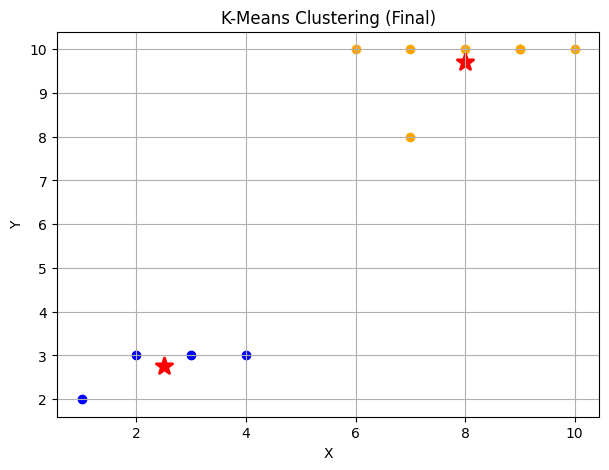

In [149]:
# Plot the final results
plt.figure(figsize=(7, 5))

# Plot data points, colored by their assigned centroid
colors = ["blue", "orange", "green", "purple", "brown"]
for i, assignment in enumerate(assignments):
    point = assignment["point"]
    centroid_idx = final_centroids.index(assignment["centroid"])
    plt.scatter(point[0], point[1], color=colors[centroid_idx % len(colors)])

# Plot final centroids
for c in final_centroids:
    plt.scatter(c["x"], c["y"], color="red", marker="*", s=150, linewidths=2)

plt.title("K-Means Clustering (Final)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## Tips


*   When the centroids are misplotted and the result is bad (like below), the first action to solve this could be to try plotting initial centroids again.



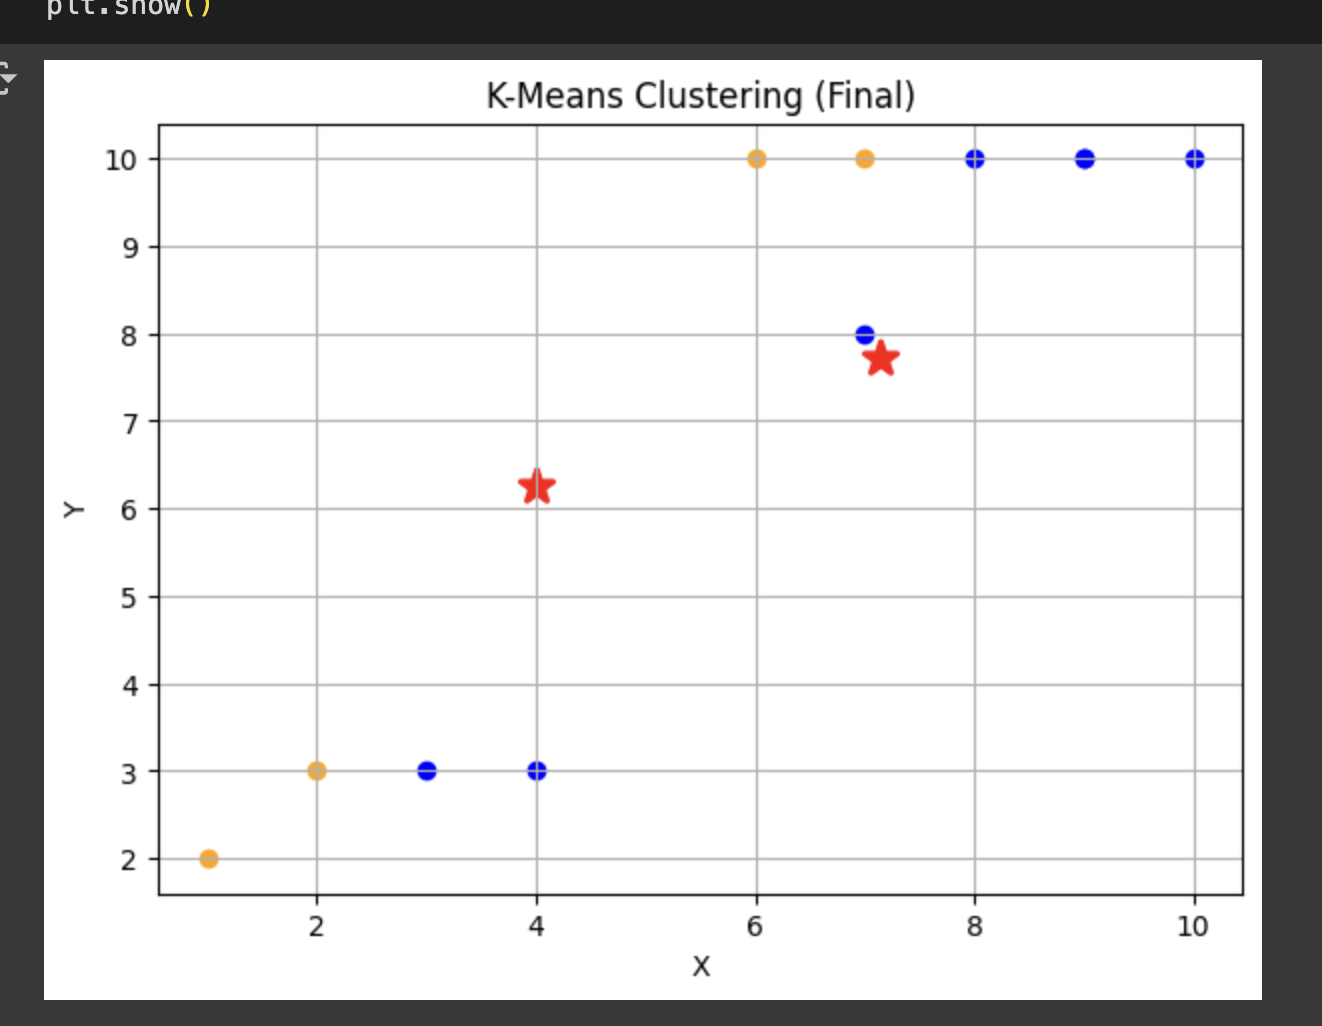